## EDA for Tracking E-mouse-tion

In [3]:
import pandas as pd
import matplotlib.pyplot as plt # always import pyplot module as plt (standard)
import numpy as np
np.random.seed(0)
%matplotlib inline
import seaborn as sns

In [4]:
data=pd.read_csv('cleaned_data')
data.head()

,Unnamed: 0,SESSION_ID,timestamp_event,x,y,pages,person,duration,change of page,/,...,MEAN-present-happiness_AU,MEAN-colere_au4_convolve,MEAN-adhesion_convolve,MEAN-surprise_au_convolve,MEAN-emergence_convolve,MEAN-pitch,MEAN-roll,MEAN-yaw,count,major emotion
0,0,00003234844012932976778236855416_20181228183826,25678.0,560.0,948.0,/,5c265f52fad06f2dc6bbff8d,2130.0,1,1,...,0.0,0.0,0.0,0.000000,0.000000,-1.220988,0.290501,0.463704,6,present-anger
1,1,00003234844012932976778236855416_20181228183826,27808.0,553.0,1117.0,/,5c265f52fad06f2dc6bbff8d,522.0,0,1,...,0.0,0.0,0.0,0.000000,0.000000,-11.226887,3.140046,-1.101734,2,present-anger
2,2,00003234844012932976778236855416_20181228183826,28330.0,553.0,1233.0,/,5c265f52fad06f2dc6bbff8d,449.0,0,1,...,0.0,0.0,0.0,0.000000,0.000000,-11.221450,2.852790,4.699109,1,present-anger
3,3,00003234844012932976778236855416_20181228183826,28779.0,628.0,1350.0,/,5c265f52fad06f2dc6bbff8d,457.0,0,1,...,0.0,0.0,0.0,1.000000,1.000000,-6.138117,5.561699,-1.903045,1,present-neutral
4,4,00003234844012932976778236855416_20181228183826,29236.0,743.0,1373.0,/,5c265f52fad06f2dc6bbff8d,17765.0,1,1,...,0.0,0.0,0.0,0.096154,0.096154,-2.437613,3.607686,-4.509504,52,present-anger


In [5]:
persons=data['person'].unique()

In [6]:
data.columns

Index(['Unnamed: 0', 'SESSION_ID', 'timestamp_event', 'x', 'y', 'pages',
       'person', 'duration', 'change of page', '/',
       ...
       'MEAN-present-happiness_AU', 'MEAN-colere_au4_convolve',
       'MEAN-adhesion_convolve', 'MEAN-surprise_au_convolve',
       'MEAN-emergence_convolve', 'MEAN-pitch', 'MEAN-roll', 'MEAN-yaw',
       'count', 'major emotion'],
      dtype='object', length=632)

In [8]:
emotions_max=['MAX-present-anger', 
       'MAX-present-disgust', 'MAX-present-fear', 'MAX-present-happiness',
       'MAX-present-neutral', 'MAX-present-sadness', 'MAX-present-surprise',
        'x','y','duration','change_in_x', 'change_in_y', 'distance', 'x_velocity',
       'y_velocity']
emotions_min=['MIN-present-anger',
       'MIN-present-disgust', 'MIN-present-fear', 'MIN-present-happiness',
       'MIN-present-neutral', 'MIN-present-sadness', 'MIN-present-surprise','MAX-pitch','MAX-roll', 
              'MAX-yaw','x','y']
emotions_mean=['MEAN-present-anger',
       'MEAN-present-disgust', 'MEAN-present-fear', 'MEAN-present-happiness',
       'MEAN-present-neutral', 'MEAN-present-sadness', 'MEAN-present-surprise','MAX-pitch','MAX-roll', 
              'MAX-yaw','x','y']
face_positions=['MAX-pitch','MAX-roll', 'MAX-yaw']

In [9]:
emotions=['MAX-present-anger', 'MAX-present-disgust',
       'MAX-present-fear', 'MAX-present-happiness', 'MAX-present-neutral',
       'MAX-present-sadness', 'MAX-present-surprise']

# Plot Change in Convolve Emotions for First 10 people 

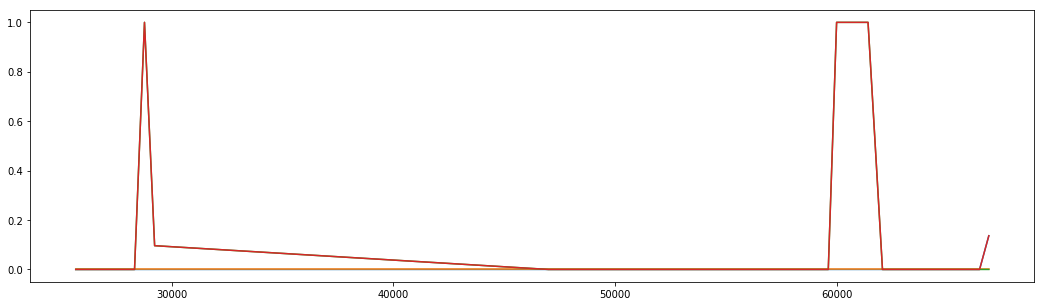

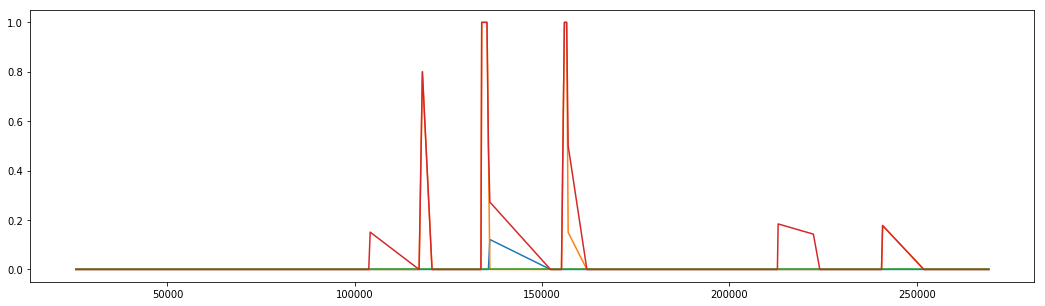

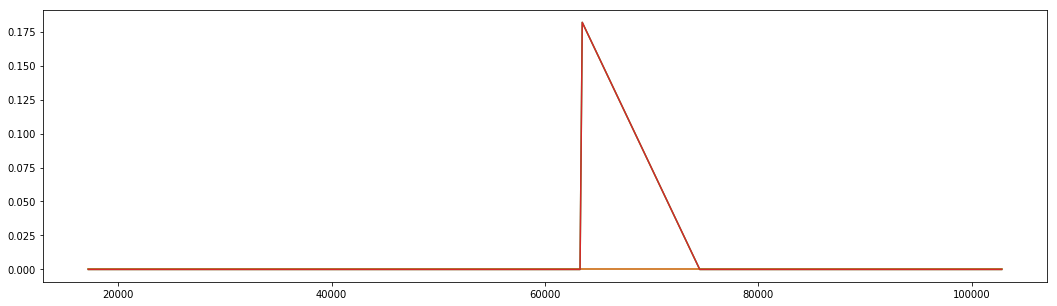

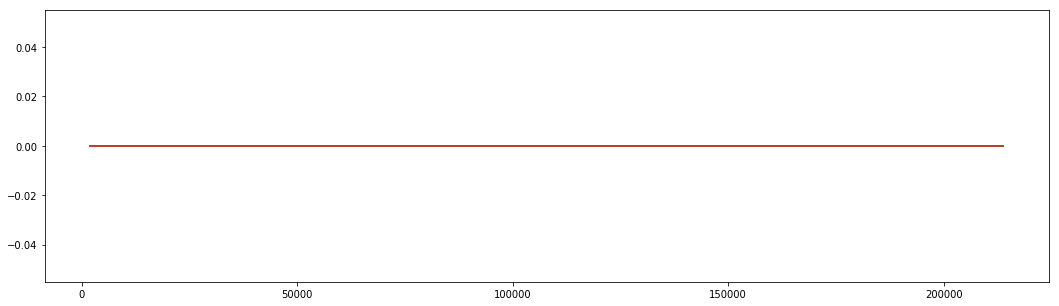

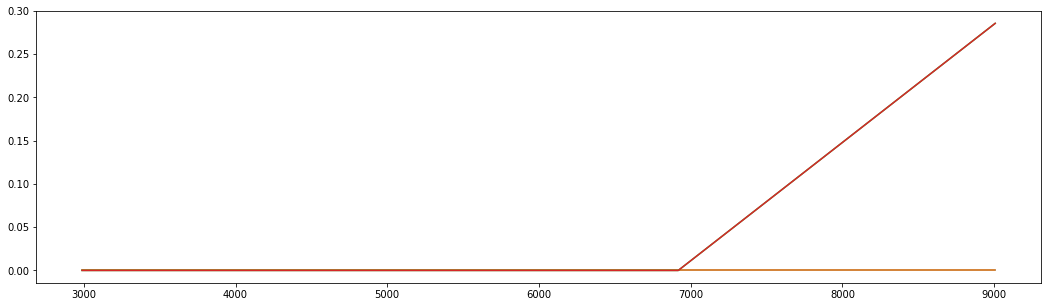

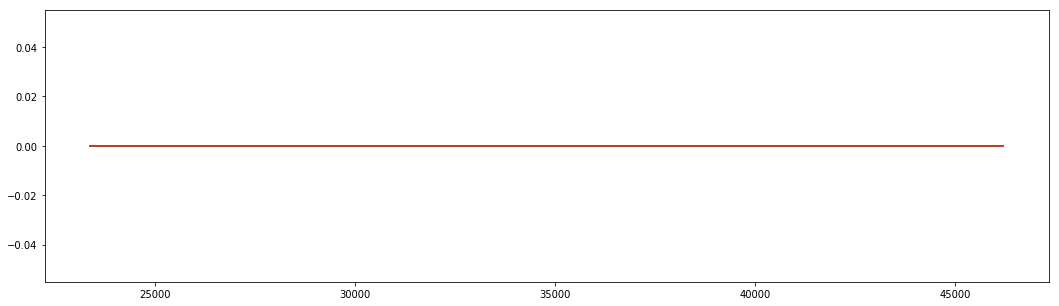

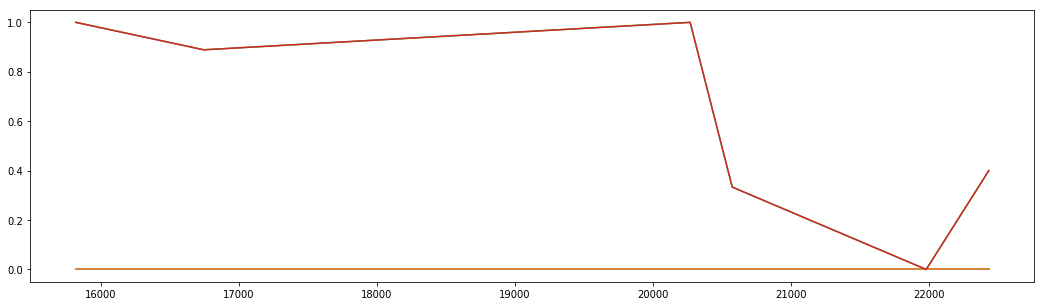

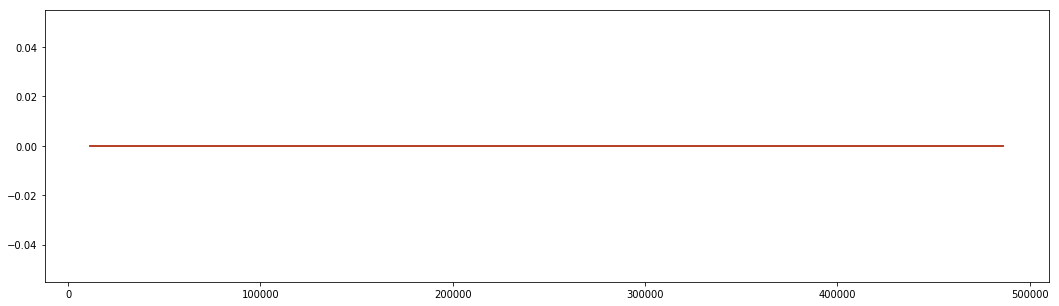

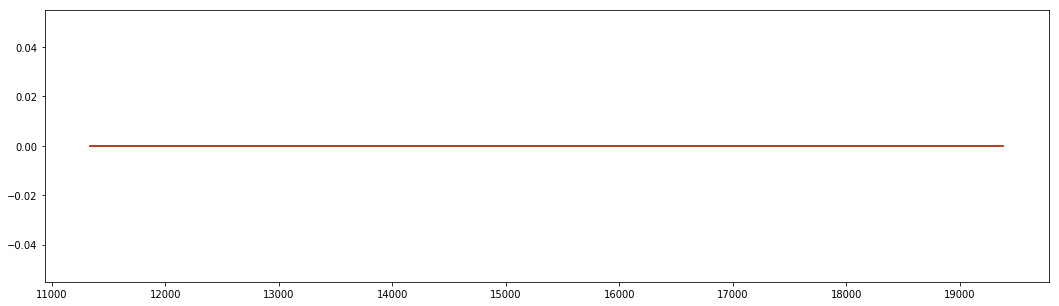

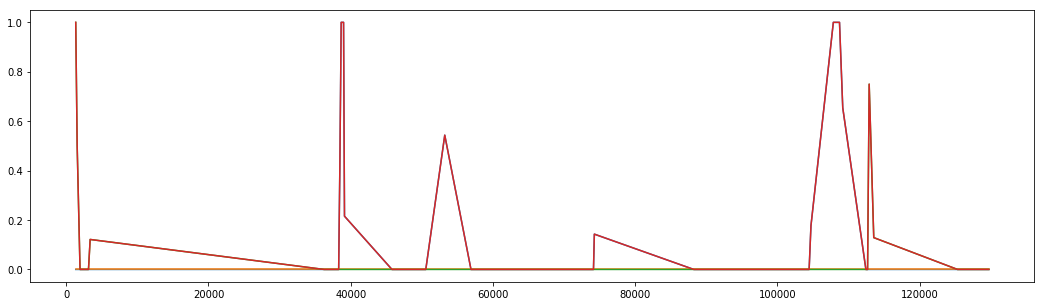

In [11]:
for i in range(10):
    data_person=data[data['person']==persons[i]]
    f, ax = plt.subplots(figsize=(18,5)) 

    ax.plot(data_person['timestamp_event'],data_person[['MEAN-colere_au4_convolve',
       'MEAN-adhesion_convolve', 'MEAN-surprise_au_convolve',
       'MEAN-emergence_convolve']]);



# Correlation matrix for individual person

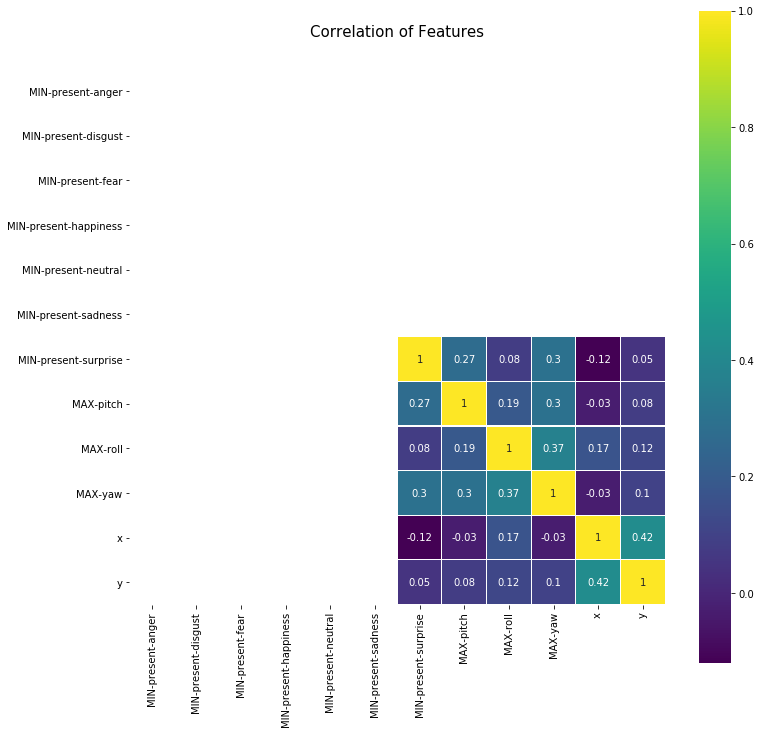

In [12]:
data_person=data[data['person']==persons[2]]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap((data_person[emotions_max]).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

# Correlation matrix for all People

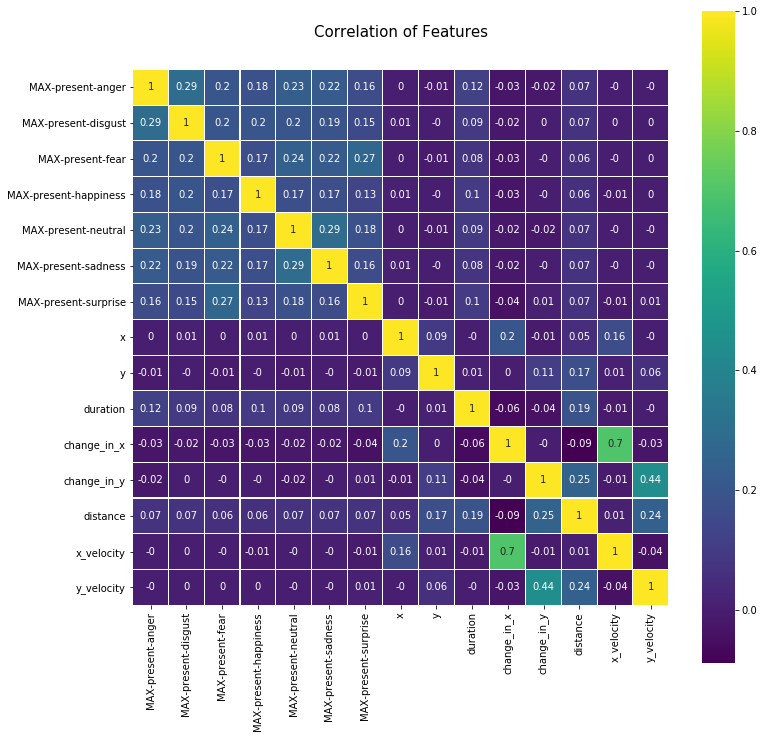

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap((data[emotions_max]).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

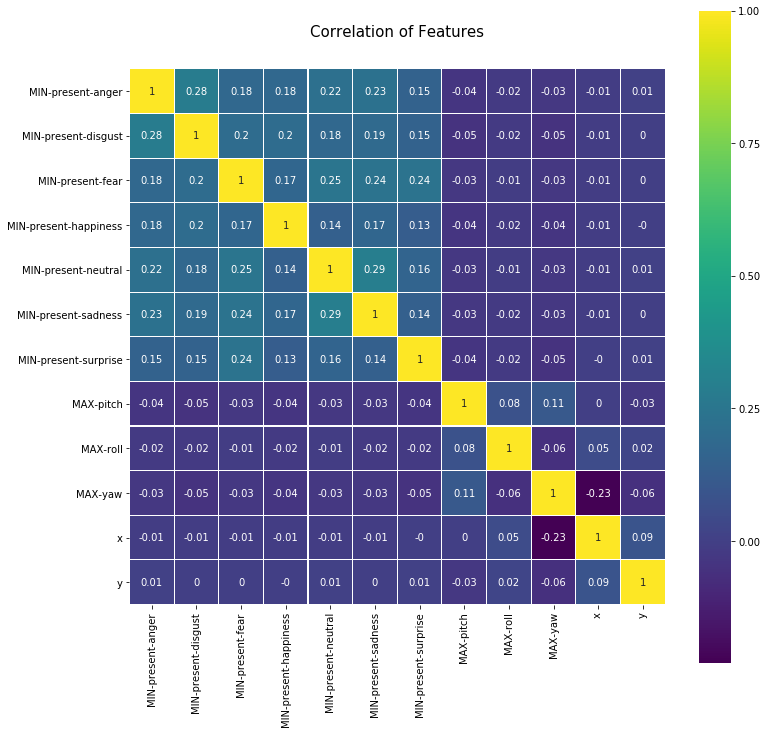

In [13]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap((data[emotions_min]).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

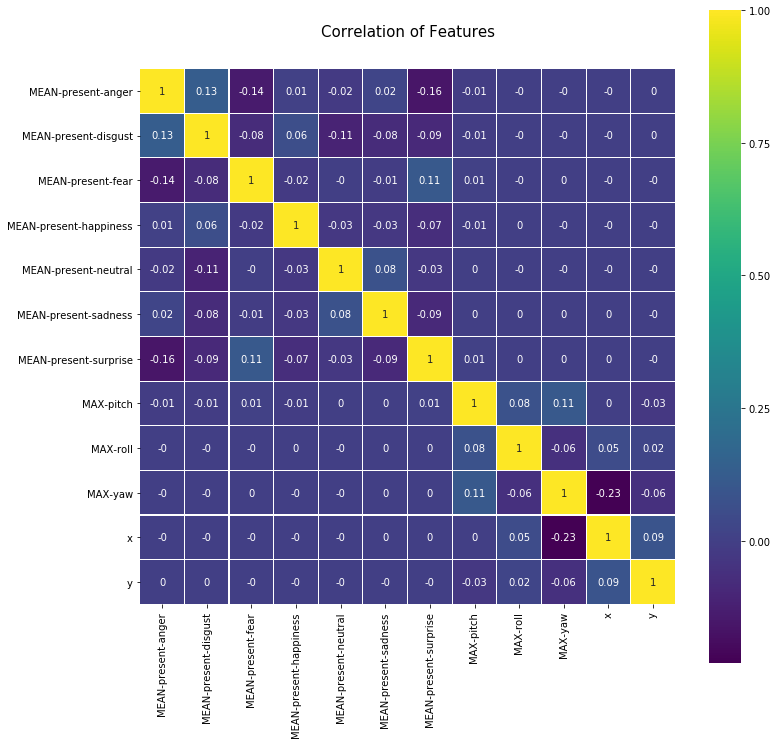

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap((data[emotions_mean]).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

## Visualization of the mouse on the screen

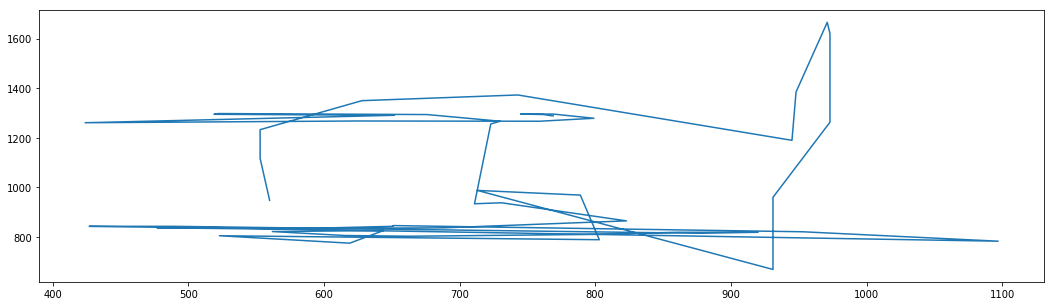

In [9]:
data_person=data[data['person']==persons[0]]
f, ax = plt.subplots(figsize=(18,5)) 
ax.plot(data_person['x'],data_person['y'])



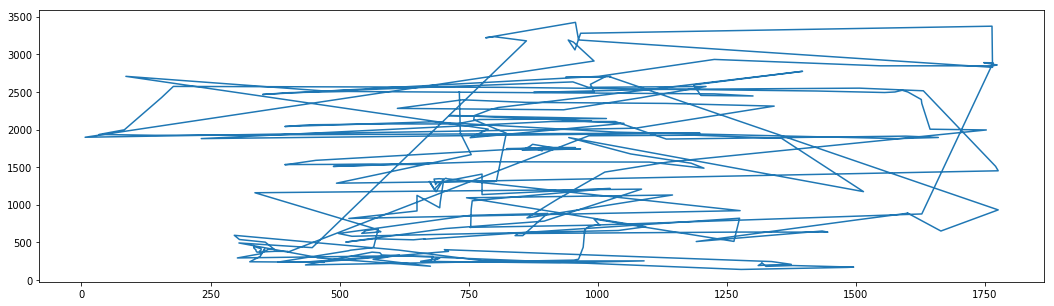

In [15]:
data_person=data[data['person']==persons[1]]
f, ax = plt.subplots(figsize=(18,5)) 
ax.plot(data_person['x'],data_person['y'])

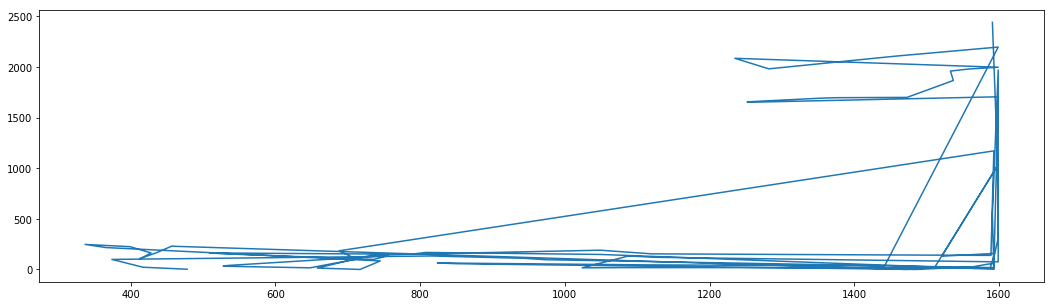

In [16]:
data_person=data[data['person']==persons[2]]
f, ax = plt.subplots(figsize=(18,5)) 
ax.plot(data_person['x'],data_person['y'])

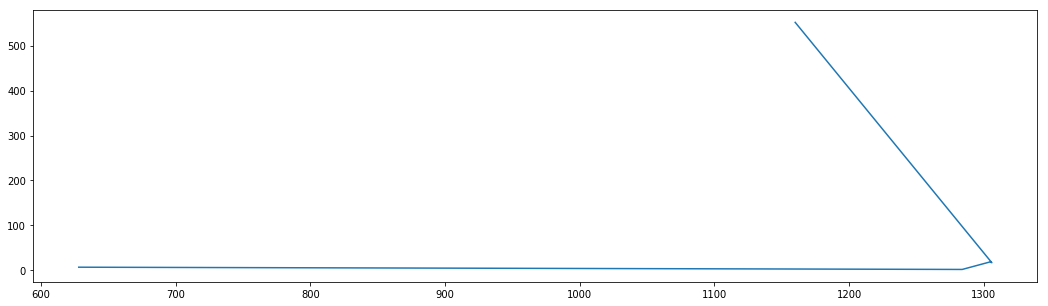

In [17]:
data_person=data[data['person']==persons[4]]
f, ax = plt.subplots(figsize=(18,5)) 
ax.plot(data_person['x'],data_person['y'])

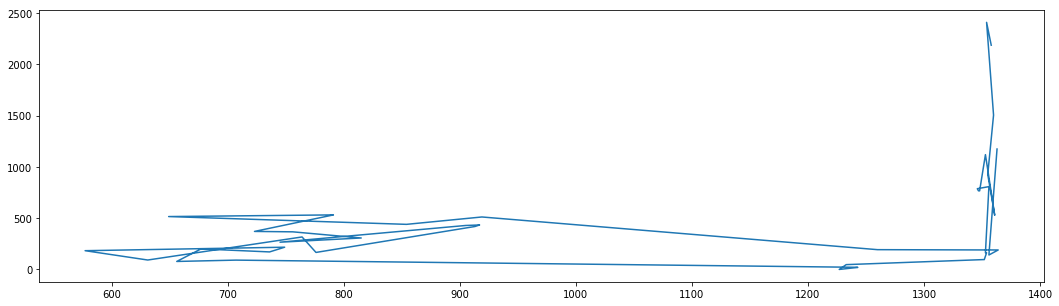

In [18]:
data_person=data[data['person']==persons[5]]
f, ax = plt.subplots(figsize=(18,5)) 
ax.plot(data_person['x'],data_person['y'])